In [2]:
import numpy as np
import time
import os

In [3]:
import torch

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
import torchvision.transforms as transforms

In [5]:
# reproducibility
import stuff
stuff.manual_seed(64)

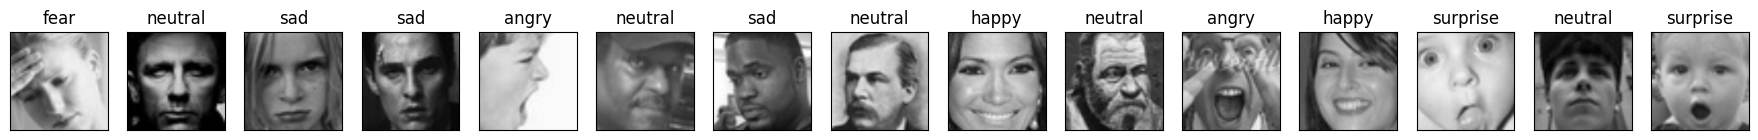

In [6]:
file = 'APS360Data/BlackWhite/test'

Transformaions = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData1 = torch.utils.data.DataLoader(FinalData, batch_size=1000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData1)

imagesBWT, labelsBWT = LoadDataIter.__next__()
imagesBWT = imagesBWT.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
	ax = fig.add_subplot(2, 20, i + 1, xticks=[], yticks=[])
	ax.set_title(classifications[labelsBWT[i]])
	plt.imshow(imagesBWT[i].transpose(1, 2, 0))


plt.show()

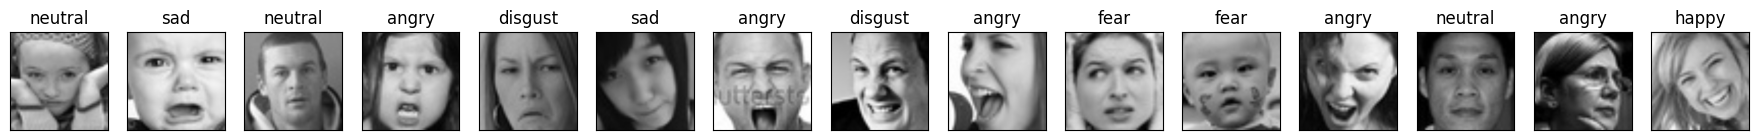

In [7]:
file = 'APS360Data/BlackWhite/train'

Transformaions = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData2 = torch.utils.data.DataLoader(FinalData, batch_size=1000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData2)

imagesBWR, labelsBWR = LoadDataIter.__next__()
imagesBWR = imagesBWR.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
	ax = fig.add_subplot(2, 20, i + 1, xticks=[], yticks=[])
	ax.set_title(classifications[labelsBWR[i]])
	plt.imshow(imagesBWR[i].transpose(1, 2, 0))


plt.show()

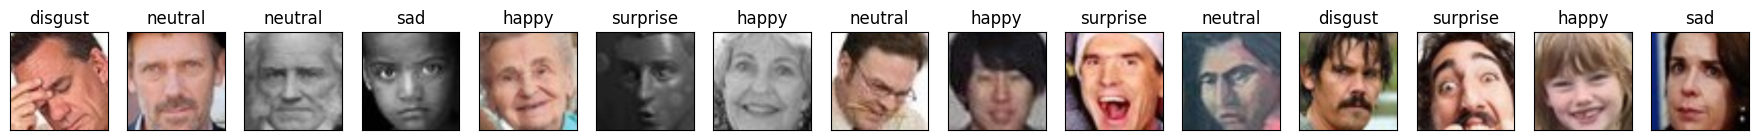

In [8]:
file = 'APS360Data/Colorful/test'

Transformaions = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData3 = torch.utils.data.DataLoader(FinalData, batch_size=1000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData3)

imagesCT, labelsCT = LoadDataIter.__next__()
imagesCT = imagesCT.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
	ax = fig.add_subplot(2, 20, i + 1, xticks=[], yticks=[])
	ax.set_title(classifications[labelsCT[i]])
	plt.imshow(imagesCT[i].transpose(1, 2, 0))


plt.show()

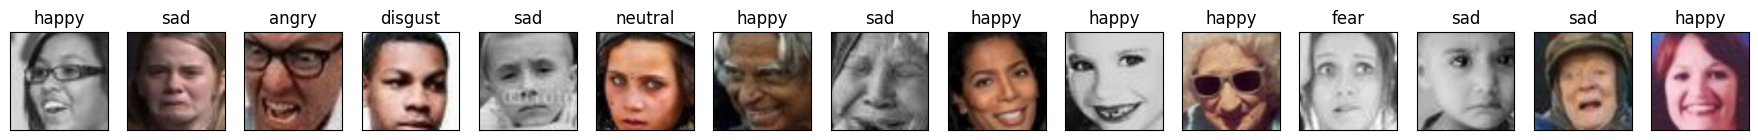

In [9]:
file = 'APS360Data/Colorful/train'

Transformaions = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData4 = torch.utils.data.DataLoader(FinalData, batch_size=1000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData4)

imagesCR, labelsCR = LoadDataIter.__next__()
imagesCR = imagesCR.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
	ax = fig.add_subplot(2, 20, i + 1, xticks=[], yticks=[])
	ax.set_title(classifications[labelsCR[i]])
	plt.imshow(imagesCR[i].transpose(1, 2, 0))


plt.show()

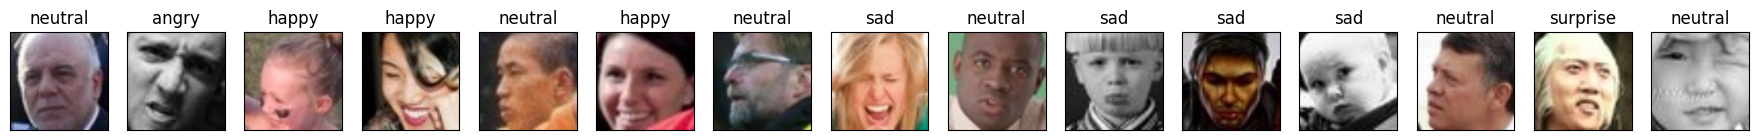

In [10]:
file = 'APS360Data/Colorful/valid'

Transformaions = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData5 = torch.utils.data.DataLoader(FinalData, batch_size=1000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData5)

imagesCV, labelsCV = LoadDataIter.__next__()
imagesCV = imagesCV.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
	ax = fig.add_subplot(2, 20, i + 1, xticks=[], yticks=[])
	ax.set_title(classifications[labelsCV[i]])
	plt.imshow(imagesCV[i].transpose(1, 2, 0))


plt.show()

In [11]:
from torch.utils.data import ConcatDataset
from torch.utils.data import DataLoader

# Assuming you have five data loaders: loader1, loader2, loader3, loader4, and loader5

# Combine the datasets from the data loaders
combined_dataset = ConcatDataset([LoadData1.dataset, LoadData2.dataset, LoadData3.dataset, LoadData4.dataset, LoadData5.dataset])
# Create a data loader using the combined dataset
combined_dataloader = DataLoader(combined_dataset, batch_size=5000, num_workers=2, shuffle=True)

LoadDataIter = iter(combined_dataloader)
images, labels = LoadDataIter.__next__()
images = images.numpy()

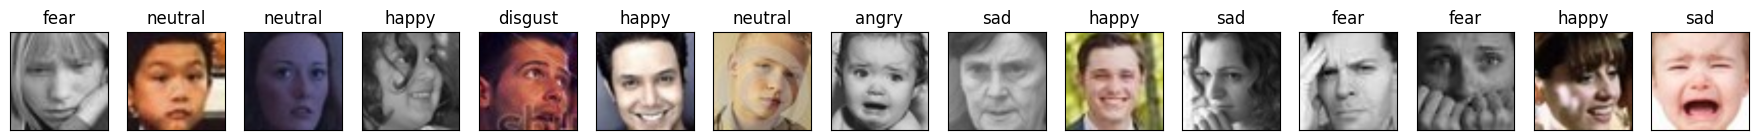

In [12]:
fig = plt.figure(figsize=(30, 8))
for i in range(15):
	ax = fig.add_subplot(2, 20, i + 1, xticks=[], yticks=[])
	ax.set_title(classifications[labels[i]])
	plt.imshow(images[i].transpose(1, 2, 0))


plt.show()

In [13]:
# Check for missing labels
missing_labels = []
if len(images) != len(labels):
	missing_labels = set(images.keys()) - set(labels.keys())

# Print the missing labels
if len(missing_labels) > 0:
	print("Images with missing labels:")
	for image_file in missing_labels:
		print(image_file)
else:
	print("No missing labels.")

No missing labels.


In [14]:
images.shape

(5000, 3, 224, 224)

In [15]:
import torchvision.transforms as transforms
import torch

# Assuming your image data is stored in the 'image' variable

# Define the normalization transform
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

# Convert the image data to a tensor
image_tensor = torch.tensor(images)

# Add a batch dimension to the image tensor
image_tensor = image_tensor.unsqueeze(0)

# Apply the normalization transform to the image tensor
normalized_image = normalize(image_tensor)

# Convert the normalized image tensor back to a NumPy array
normalized_image_array = normalized_image.squeeze(0).numpy()

In [16]:
# Define the rotation augmentation transform
rotation_transform = transforms.RandomRotation(degrees=(-25, 25))

# Apply random rotation augmentation to each image
augmented_images = []
for normalized_image_array in normalized_image_array:
	# Convert the normalized image array to a tensor
	normalized_image_tensor = torch.from_numpy(normalized_image_array)

	# Apply the rotation transform to the normalized image tensor
	augmented_image_tensor = rotation_transform(normalized_image_tensor)

	# Convert the augmented image tensor back to a NumPy array
	augmented_image_array = augmented_image_tensor.numpy()

	augmented_images.append(augmented_image_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

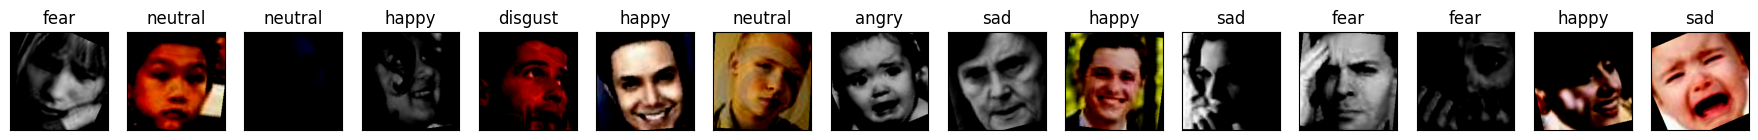

In [17]:
fig = plt.figure(figsize=(30, 8))
for i in range(15):
	ax = fig.add_subplot(2, 20, i + 1, xticks=[], yticks=[])
	ax.set_title(classifications[labels[i]])
	plt.imshow(augmented_images[i].transpose(1, 2, 0))


plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

# Split the transformed data into training and temporary sets
images_train, images_temp, labels_train, labels_temp = train_test_split(augmented_images, labels, test_size=0.3, random_state=42)

# Split the temporary data into validation and testing sets
images_val, images_test, labels_val, labels_test = train_test_split(images_temp, labels_temp, test_size=0.5, random_state=42)

In [32]:
class CombinedDataset(Dataset):
	def __init__(self, images: list[np.ndarray], labels: torch.Tensor):
		self.images = torch.stack(list(map(lambda x: torch.from_numpy(x).to(torch.float16), images)))
		self.labels = labels.to(torch.float16)

	def __len__(self):
		return len(self.images)

	def __getitem__(self, idx):
		image = self.images[idx]
		label = self.labels[idx]
		return image, label


train_dataset = CombinedDataset(images_train, labels_train)
valid_dataset = CombinedDataset(images_val, labels_val)
test_dataset = CombinedDataset(images_test, labels_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

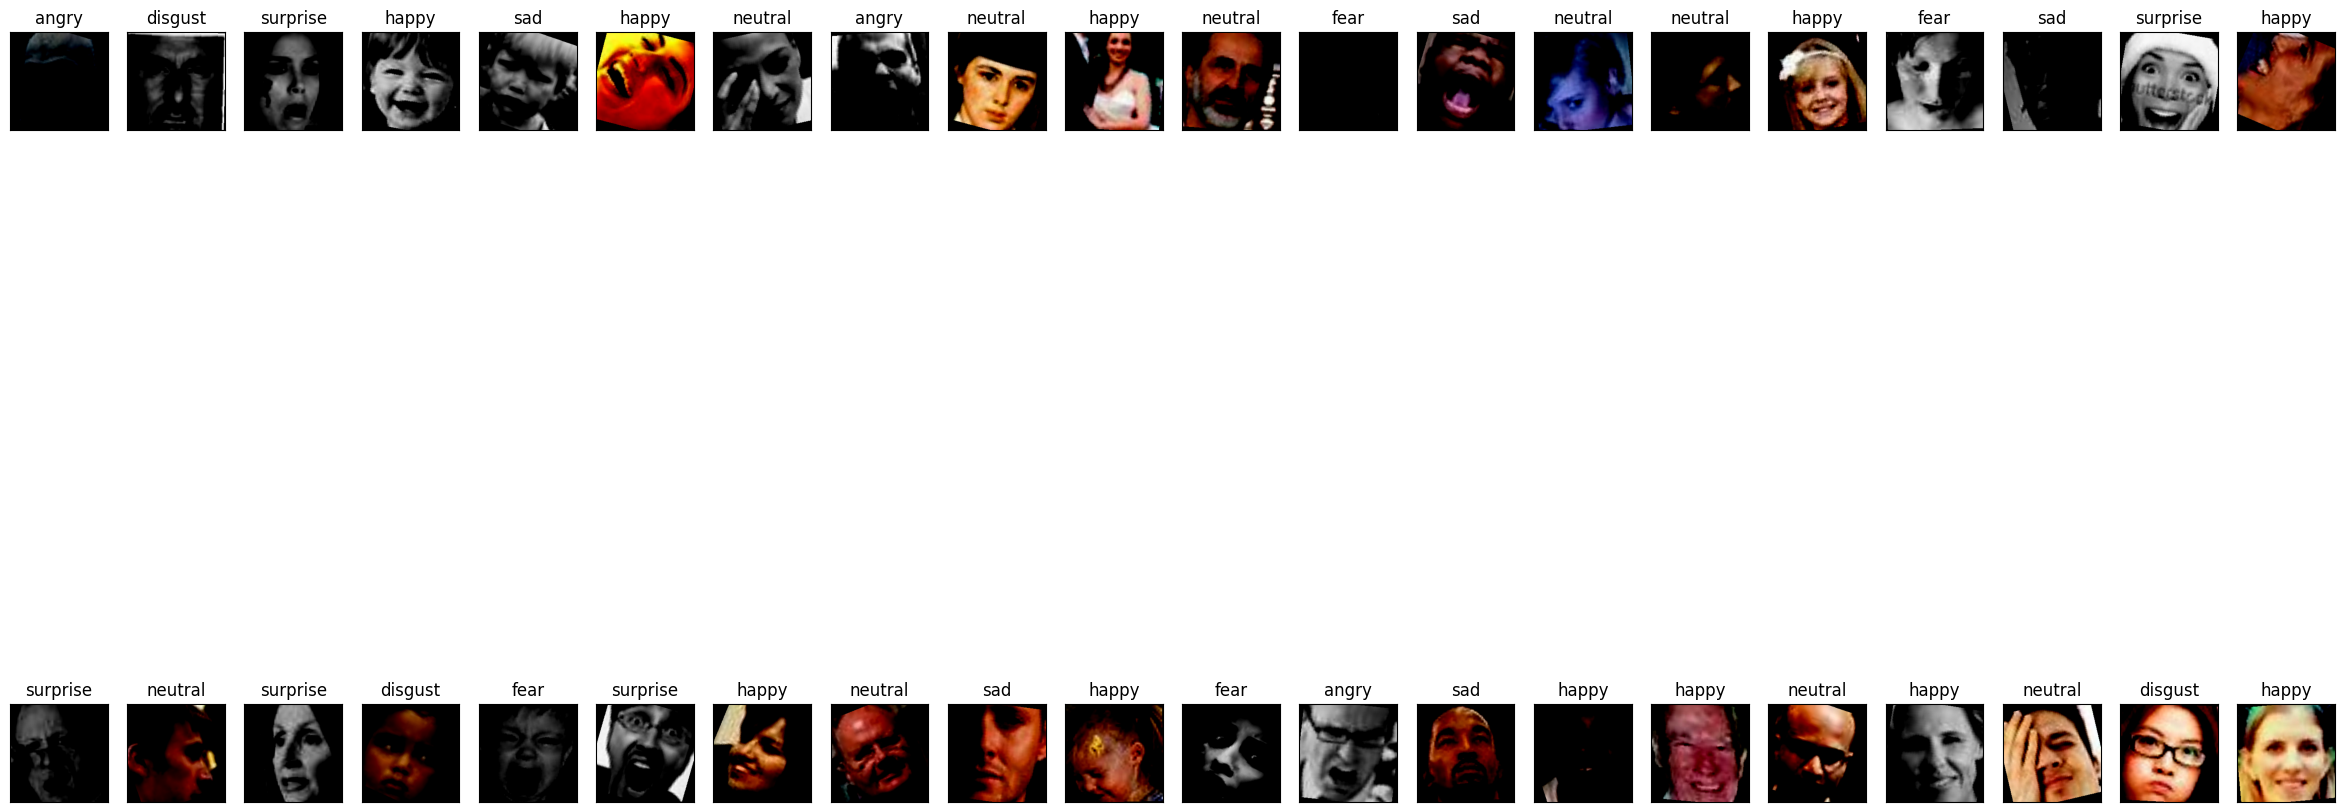

In [19]:
fig = plt.figure(figsize=(30, 16))
for i in range(40):
	ax = fig.add_subplot(2, 20, i + 1, xticks=[], yticks=[])
	ax.set_title(classifications[labels_train[i]])
	plt.imshow(images_train[i].transpose(1, 2, 0))


plt.show()

In [20]:
# compress then save the datasets
import pickle, os
path = 'data'
# compress = '.bz2'
compress = ''
if compress == '.bz2':
	from bz2 import open
# create folder is not exist
if not os.path.exists(path): os.makedirs(path)
with open(path + '/train.pkl' + compress, 'wb') as f:
	pickle.dump(train_dataset, f)
with open(path + '/valid.pkl' + compress, 'wb') as f:
	pickle.dump(valid_dataset, f)
with open(path + '/test.pkl' + compress, 'wb') as f:
	pickle.dump(test_dataset, f)

## Train baseline model

In [ ]:
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
x_train, y_train = np.array(images_train[:500]).flatten().reshape(500, -1), labels_train[:500]
model.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

x_test, y_test = np.array(images_test[:10]).flatten().reshape(10, -1), labels_test[:10]

accuracy_score(model.predict(x_test), y_test)
# model.predict(x_test), y_test